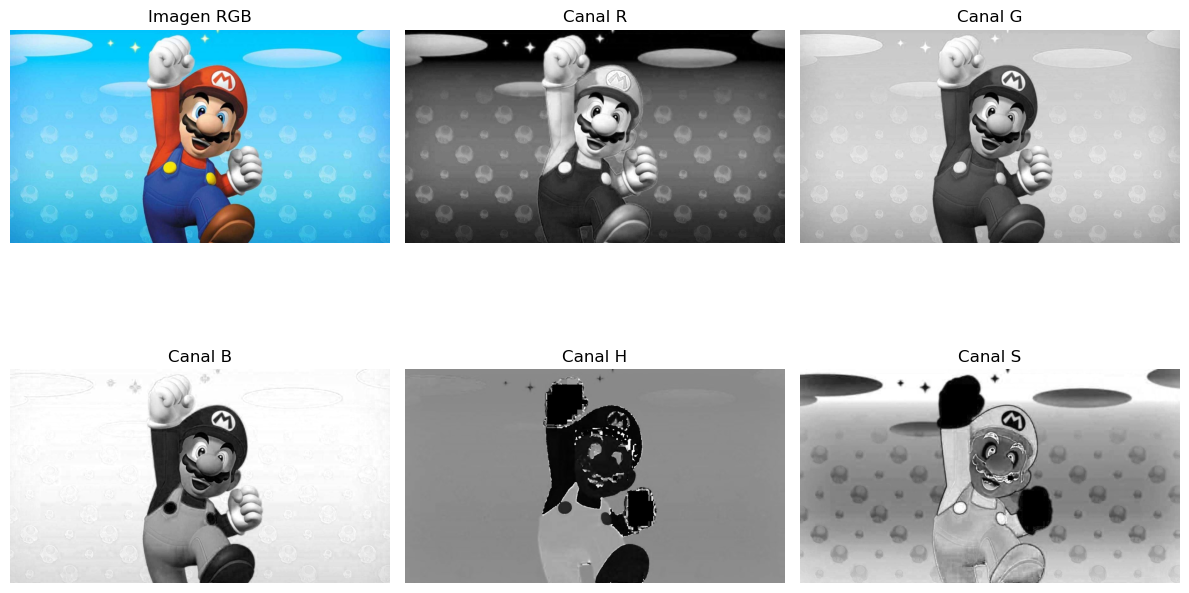

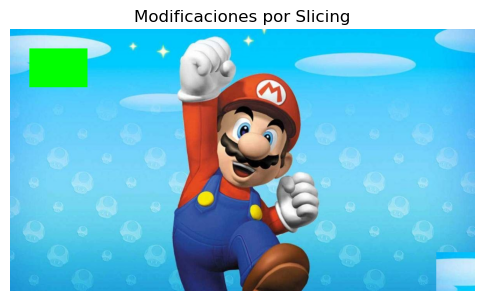

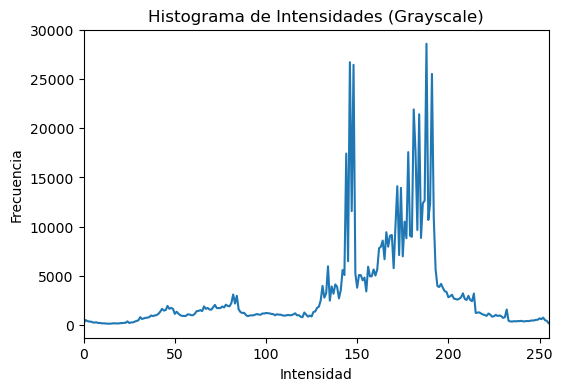

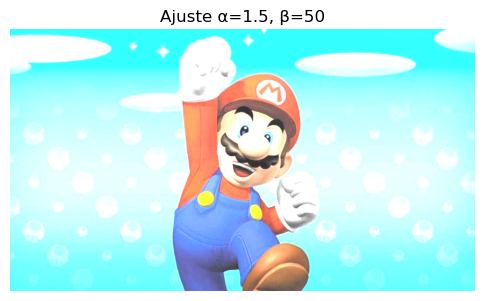

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar una imagen en color
path = 'mario.jpg'  # Cambia esta ruta a tu imagen
img_color = cv2.imread(path)

# Verificar si la imagen se cargó correctamente
if img_color is None:
    print(f"No se pudo cargar la imagen en '{path}'. Asegúrate de que la ruta sea correcta.")
    exit()

# 2. Acceder y mostrar los canales RGB y HSV por separado
img_rgb = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)  # Convertimos a RGB
img_hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)  # Convertimos a HSV

# Mostrar los canales RGB y HSV
r, g, b = cv2.split(img_rgb)
h, s, v = cv2.split(img_hsv)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(img_rgb); axes[0, 0].set_title('Imagen RGB'); axes[0, 0].axis('off')
axes[0, 1].imshow(r, cmap='gray'); axes[0, 1].set_title('Canal R'); axes[0, 1].axis('off')
axes[0, 2].imshow(g, cmap='gray'); axes[0, 2].set_title('Canal G'); axes[0, 2].axis('off')
axes[1, 0].imshow(b, cmap='gray'); axes[1, 0].set_title('Canal B'); axes[1, 0].axis('off')
axes[1, 1].imshow(h, cmap='gray'); axes[1, 1].set_title('Canal H'); axes[1, 1].axis('off')
axes[1, 2].imshow(s, cmap='gray'); axes[1, 2].set_title('Canal S'); axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

# 3. Utilizar slicing para modificar regiones específicas de la imagen

# Cambiar el color de un área rectangular
mod_img = img_color.copy()
mod_img[50:150, 50:200] = [0, 255, 0]  # Área rectangular a color verde

# Sustituir una región por otra parte de la imagen
patch = img_color[0:100, 0:100].copy()
mod_img[-100:, -100:] = patch  # Copia la esquina superior izquierda en la inferior derecha

plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(mod_img, cv2.COLOR_BGR2RGB))
plt.title('Modificaciones por Slicing')
plt.axis('off')
plt.show()

# 4. Calcular y visualizar el histograma de intensidades (escala de grises)
gray = cv2.cvtColor(img_color, cv2.COLOR_BGR2GRAY)
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

plt.figure(figsize=(6, 4))
plt.plot(hist)
plt.title('Histograma de Intensidades (Grayscale)')
plt.xlabel('Intensidad')
plt.ylabel('Frecuencia')
plt.xlim([0, 255])
plt.show()

# 5. Ajustar el brillo y contraste (manualmente y con OpenCV)
alpha = 1.5  # Contraste (1.0-3.0)
beta = 50    # Brillo (0-100)

adjusted = cv2.convertScaleAbs(img_color, alpha=alpha, beta=beta)

# Visualizar la imagen con los ajustes de brillo y contraste
adjusted_rgb = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(6, 6))
plt.imshow(adjusted_rgb)
plt.title(f'Ajuste α={alpha}, β={beta}')
plt.axis('off')
plt.show()


